In [1]:
import numpy as np
import richdem as rd
from matplotlib import pyplot as pl
from matplotlib.colors import LogNorm
pl.rcParams['figure.figsize'] = [14, 7]

def gaussian_hill_elevation(n, b = 2.5):
    x, y = np.meshgrid(np.linspace(-b,b,n),
                       np.linspace(-b,b,n))
    z = np.exp(-x*x-y*y)
    return (x, y, z)

def gaussian_hill_slope(n, b = 2.5):
    x, y = np.meshgrid(np.linspace(-b,b,n),
                       np.linspace(-b,b,n))
    r = np.sqrt(x*x+y*y)
    return 2*r*np.exp(-r*r)

def gaussian_hill_curvature(n, b = 2.5):
    x, y = np.meshgrid(np.linspace(-b,b,n),
                       np.linspace(-b,b,n))
    r = np.sqrt(x*x+y*y)
    return (1 - 2*r*r)*2*np.exp(-r*r)

def gaussian_hill_sca(n, b = 2.5):
    x, y = np.meshgrid(np.linspace(-b,b,n),
                       np.linspace(-b,b,n))
    r = np.sqrt(x*x+y*y)
    return r/2.0

def np_slope(x, y, z):
    d = y[1,0] - y[0,0]
    dy, dx = np.gradient(z, d)
    return np.sqrt(dx*dx+dy*dy)

def np_curvature(x, y, z):
    d = y[1,0] - y[0,0]
    dy, dx = np.gradient(z, d)
    dz = np.sqrt(dx*dx+dy*dy)
    dy, dx = np.gradient(dz, d)
    return np.sqrt(dx*dx+dy*dy)

In [2]:
# Gaussian hill
n = 234
x, y, z = gaussian_hill_elevation(n)
d = y[1,0] - y[0,0]
sca = rd.FlowAccumulation(rd.rdarray(z, no_data = -9999), method = 'Freeman', exponent = 1.1)
sca *= d

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


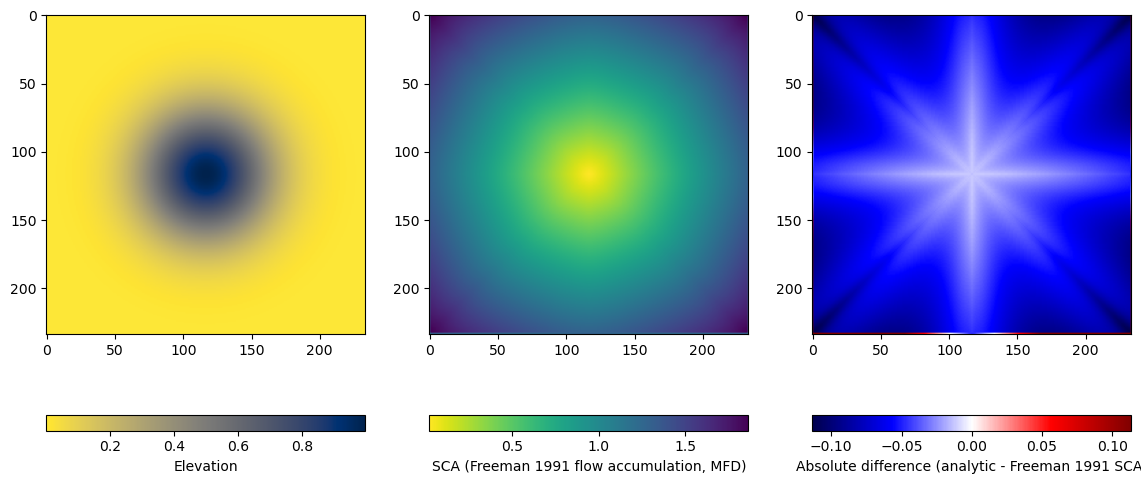

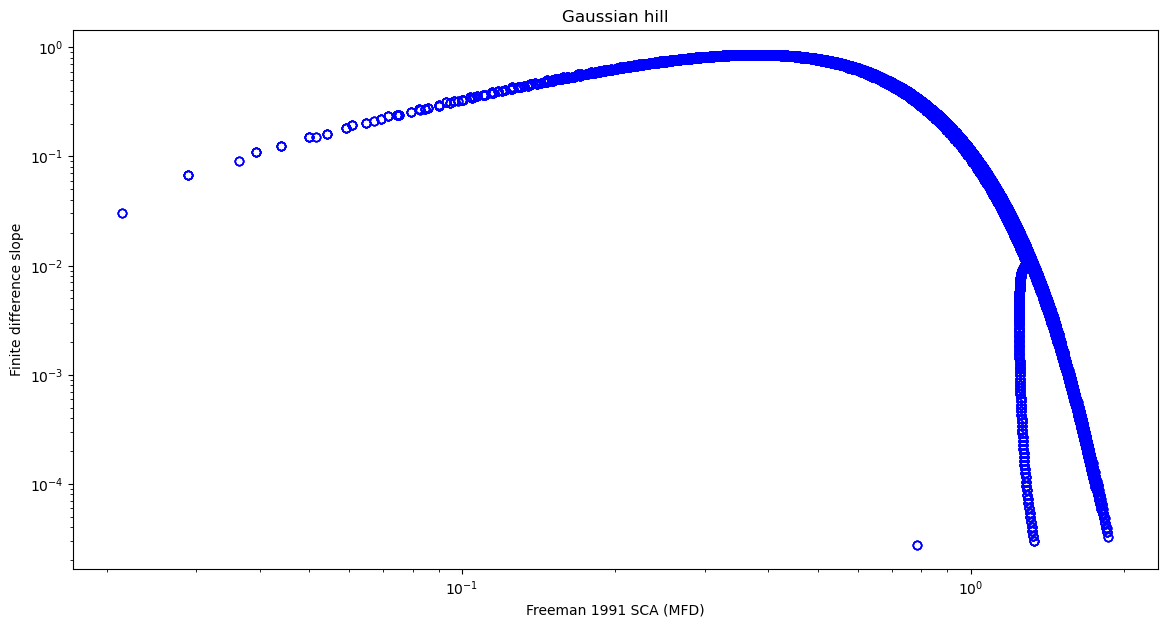

In [3]:
fg, ax = pl.subplots(1, 3)
im = ax[0].imshow(z, cmap = pl.cm.cividis_r)
cb = fg.colorbar(im, ax = ax[0], orientation = 'horizontal')
cb.set_label('Elevation')

im = ax[1].imshow(sca, cmap = pl.cm.viridis_r)
cb = fg.colorbar(im, ax = ax[1], orientation = 'horizontal')
cb.set_label('SCA (Freeman 1991 flow accumulation, MFD)')

v = gaussian_hill_sca(n) - sca
vmin = v.min()
im = ax[2].imshow(v, cmap = pl.cm.seismic, vmin = vmin, vmax = -vmin)
cb = fg.colorbar(im, ax = ax[2], orientation = 'horizontal')
cb.set_label('Absolute difference (analytic - Freeman 1991 SCA)')
pl.show()

pl.title('Gaussian hill')
pl.loglog(sca, np_slope(x, y, z), 'bo', mfc = 'none')
pl.xlabel('Freeman 1991 SCA (MFD)')
pl.ylabel('Finite difference slope')
pl.show()